### 2-(b)
Demonstrate the different characteristics of the distribution of the page rank for the
Erdösz/Renyi model compared to the Barabasi/Albert graph model in an example (e.g. generate
random graph/s with similar number of nodes and edges for each model, compute page rank
and compare characteristics of the resulting value distribution such as moments).

In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [14]:
num_nodes = 1000  # Number of nodes
num_edges = 5000  # Number of edges (for Erdős-Rényi)

In [15]:
# Erdős-Rényi Graph
p = num_edges / (num_nodes * (num_nodes - 1) / 2)  #edge probability
G_er = nx.erdos_renyi_graph(num_nodes, p)

#Barabási-Albert Graph
G_ba = nx.barabasi_albert_graph(num_nodes, m=5) 

In [16]:
#PageRank
pagerank_er = nx.pagerank(G_er)
pagerank_ba = nx.pagerank(G_ba)

pagerank_er_values = np.array(list(pagerank_er.values()))  
pagerank_ba_values = np.array(list(pagerank_ba.values()))

In [20]:
#Moments
def calculate_moments(data):
    mean = np.mean(data)
    variance = np.var(data)
    skewness = skew(data)
    kurt = kurtosis(data)
    return mean, variance, skewness, kurt

moments_er = calculate_moments(pagerank_er_values)
moments_ba = calculate_moments(pagerank_ba_values)

#Results
print("Erdős-Rényi PageRank Moments (Mean, Variance, Skewness, Kurtosis):", moments_er)
print("Barabási-Albert PageRank Moments (Mean, Variance, Skewness, Kurtosis):", moments_ba)

Erdős-Rényi PageRank Moments (Mean, Variance, Skewness, Kurtosis): (0.0009999999999999998, 6.710391064176999e-08, 0.35748064804855595, 0.2976930019884745)
Barabási-Albert PageRank Moments (Mean, Variance, Skewness, Kurtosis): (0.001, 7.918495529531518e-07, 5.13322097447956, 35.73508069330954)


## PageRank Distribution

### Erdős-Rényi Graph
The PageRank distribution for Erdős-Rényi Graph is more uniform as seen in the histogram below, because each node has roughly the same probability of being connected.

### Barabási-Albert Graph
The PageRank distribution for Barabási-Albert Graph shows a power-law behavior, as expected indicating that a few nodes have significantly higher PageRank than the majority.


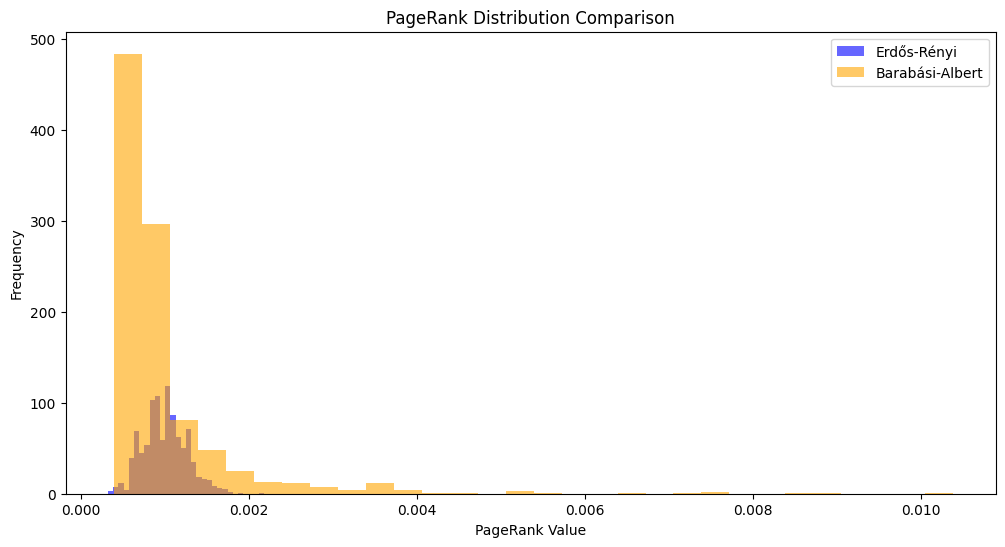

In [21]:
plt.figure(figsize=(12, 6))
plt.hist(pagerank_er_values, bins=30, alpha=0.6, label='Erdős-Rényi', color='blue')
plt.hist(pagerank_ba_values, bins=30, alpha=0.6, label='Barabási-Albert', color='orange')
plt.title('PageRank Distribution Comparison')
plt.xlabel('PageRank Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()